In [1]:
#done
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import os

In [2]:
print("Part 1.\n\n")

df = pd.read_excel("/Users/jacopomichelacci/FINM_32500/data/barnstable_analysis_data.xlsx", sheet_name="data")
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)

date_1965 = "1965-01-29 00:00:00"
date_1999 = "1999-12-31 00:00:00"

#calc log returns
df["logSPX"] = np.log(1 + df["SPX"])
df["logTB1M"] = np.log(1 + df["TB1M"])

df_log = df[["logSPX", "logTB1M"]]
df = df[["SPX", "TB1M"]]


subs = df.loc[date_1965:date_1999]
ends = df.loc[date_1999:]

subs_log = df_log.loc[date_1965:date_1999]
ends_log = df_log.loc[date_1999:]


mean_subs, mean_log_subs = subs.mean() * 12, subs_log.mean() * 12
mean_ends, mean_log_ends = ends.mean() * 12, ends_log.mean() * 12
mean_tots, mean_log_tots = df.mean() * 12, df_log.mean() * 12

vol_subs, vol_log_subs = subs.std() * (12 ** 0.5), subs_log.std() * (12 ** 0.5)
vol_ends, vol_log_ends = ends.std() * (12 ** 0.5), ends_log.std() * (12 ** 0.5)
vol_tots, vol_log_tots = df.std() * (12 ** 0.5), df_log.std() * (12 ** 0.5)

summary_spx = pd.DataFrame({
    "1965-1999" : [mean_subs["SPX"], vol_subs["SPX"], mean_log_subs["logSPX"], vol_log_subs["logSPX"]],
    "2000-2024" : [mean_ends["SPX"], vol_ends["SPX"], mean_log_ends["logSPX"], vol_log_ends["logSPX"]],
    "1926-2024" : [mean_tots["SPX"], vol_tots["SPX"], mean_log_tots["logSPX"], vol_log_tots["logSPX"]]
}, index=["Mean (levels)", "Vol (levels)", "Mean (log)", "Vol (log)"])

summary_tb1m = pd.DataFrame({
    "1965-1999": [mean_subs["TB1M"], vol_subs["TB1M"], mean_log_subs["logTB1M"], vol_log_subs["logTB1M"]],
    "2000-2024": [mean_ends["TB1M"], vol_ends["TB1M"], mean_log_ends["logTB1M"], vol_log_ends["logTB1M"]],
    "1926-2024": [mean_tots["TB1M"], vol_tots["TB1M"], mean_log_tots["logTB1M"], vol_log_tots["logTB1M"]],
}, index=["Mean (Levels)", "Vol (Levels)", "Mean (Logs)", "Vol (Logs)"])

print("SPX:")
print(summary_spx.round(4), "\n\n")
print("TB1M:")
print(summary_tb1m.round(4))


Part 1.


SPX:
               1965-1999  2000-2024  1926-2024
Mean (levels)     0.1294     0.0897     0.1155
Vol (levels)      0.1494     0.1530     0.1866
Mean (log)        0.1176     0.0777     0.0978
Vol (log)         0.1496     0.1539     0.1859 


TB1M:
               1965-1999  2000-2024  1926-2024
Mean (Levels)     0.0615     0.0176     0.0319
Vol (Levels)      0.0072     0.0056     0.0085
Mean (Logs)       0.0613     0.0175     0.0318
Vol (Logs)        0.0071     0.0056     0.0085


Part 2.


Sharpe: 0.3763

h = 15, p: 0.0725

h = 30, p: 0.0197



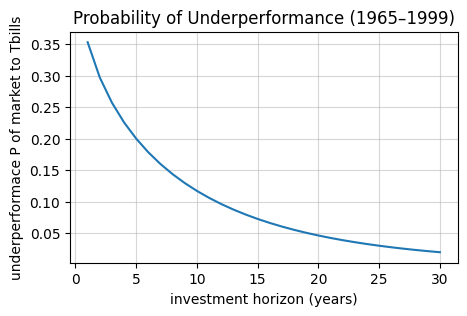

In [3]:
print("Part 2.\n\n")

sharpe_subs = (mean_log_subs["logSPX"] - mean_log_subs["logTB1M"] ) / vol_log_subs["logSPX"]
print(f"Sharpe: {sharpe_subs:.4f}\n")

for h in [15,30]:
    p_h = norm.cdf(-(h ** 0.5) * sharpe_subs)
    print(f"h = {h}, p: {p_h:.4f}\n")

    
h = np.arange(1,31)
p = norm.cdf(-(h ** 0.5) * sharpe_subs)

plt.figure(figsize=(5,3))
plt.plot(h, p)
plt.xlabel("investment horizon (years)")
plt.ylabel("underperformace P of market to Tbills")
plt.title("Probability of Underperformance (1965–1999)")
plt.grid(alpha=0.5)
plt.show()




Part 3.




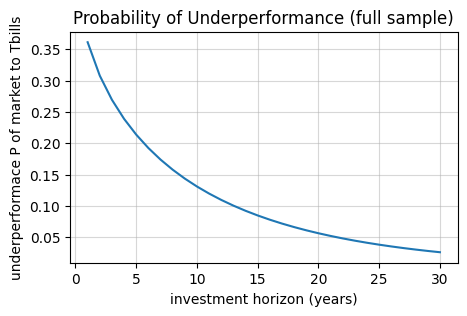

In [4]:
print("Part 3.\n\n")\

sharpe_tots = (mean_log_tots["logSPX"] - mean_log_tots["logTB1M"]) / vol_log_tots["logSPX"]


h = np.arange(1,31)
p = norm.cdf(-(h ** 0.5) * sharpe_tots)

plt.figure(figsize=(5,3))
plt.plot(h,p)
plt.xlabel("investment horizon (years)")
plt.ylabel("underperformace P of market to Tbills")
plt.title("Probability of Underperformance (full sample)")
plt.grid(alpha=0.5)
plt.show()


Part 4. 




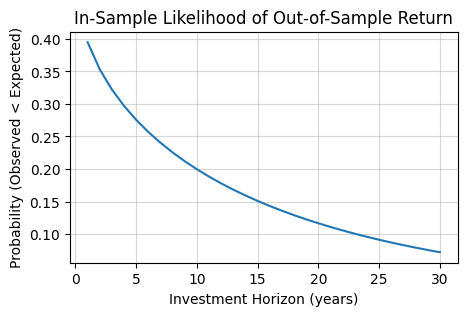

In [5]:
print("Part 4. \n\n")

h = np.arange(1,31)
p = norm.cdf((h ** 0.5) * ((mean_log_ends["logSPX"] - mean_log_subs["logSPX"]) / vol_log_subs["logSPX"]))

plt.figure(figsize=(5,3))
plt.plot(h,p)
plt.xlabel("Investment Horizon (years)")
plt.ylabel("Probability (Observed < Expected)")
plt.title("In-Sample Likelihood of Out-of-Sample Return")
plt.grid(alpha=0.5)
plt.show()

In [6]:
print("Exercise VaR 1.1\n\n")

df = pd.read_excel("/Users/jacopomichelacci/FINM_32500/data/spx_returns_weekly.xlsx", sheet_name="s&p500 rets")
df.set_index("date", inplace= True)
df = df[["AAPL", "META", "NVDA", "TSLA"]]

vol = df.std() * (52 ** 0.5)
VaR_05 = df.quantile(0.05)
CVaR_05 = df.apply(lambda x: x[x <= x.quantile(0.05)].mean())

results = pd.DataFrame({
    "vol: " : vol,
    "VaR.05: " : VaR_05,
    "CVaR.05: " : CVaR_05 
})

print(results.round(4), "\n\n")

#Equally weighted portfolio

ew_portfolio_r = df.mean(axis=1)
ew_portfolio_r = pd.DataFrame(ew_portfolio_r, columns=["EW Porfolio"])

vol_ew = ew_portfolio_r.std() * (52 ** 0.5)
VaR_05_ew = ew_portfolio_r.quantile(0.05)
CVaR_05_ew = ew_portfolio_r.apply(lambda x: x[x <= x.quantile(0.05)].mean())

print("Equally Weighted Portfolio: \n")

results_ew = pd.DataFrame({
    "vol: " : vol_ew,
    "VaR.05: " : VaR_05_ew,
    "CVaR.05: " : CVaR_05_ew 
})
print(results_ew, "\n\n")

#replace most volatile asset with negligible risk free rate (0)
most_volatile = vol.idxmax()
df3 = df.drop(columns=[most_volatile])

portfolio_3ass = df3.mean(axis=1) * (0.75)
portfolio_3ass = pd.DataFrame(portfolio_3ass, columns=["portfolio 3 assets"])

vol_port3 = portfolio_3ass.std() * (52 ** 0.5)
VaR_05_port3 = portfolio_3ass.quantile(0.05)
CVaR_05_port3 = portfolio_3ass.apply(lambda x: x[x <= x.quantile(0.05)].mean())

print("Portfolio with 3 Assets: \n")

results_port3 = pd.DataFrame({
    "vol port3" : vol_port3,
    "VaR.05: " : VaR_05_port3,
    "CVaR.05: " : CVaR_05_port3
})

print(results_port3, "\n\n")


#findings about decrease in vol with port 3
print("% of TSLA vol over tot vol: ", (vol["TSLA"] / vol.sum()).round(4))
print("% of decrease in vol with port 3: ", ((vol_ew.iloc[0] - vol_port3.iloc[0]) / vol_ew.iloc[0]).round(4), "\n")



Exercise VaR 1.1


       vol:   VaR.05:   CVaR.05: 
AAPL  0.2766   -0.0564    -0.0831
META  0.3513   -0.0700    -0.1032
NVDA  0.4633   -0.0869    -0.1165
TSLA  0.5864   -0.1174    -0.1478 


Equally Weighted Portfolio: 

                vol:   VaR.05:   CVaR.05: 
EW Porfolio  0.315543  -0.06195  -0.084992 


Portfolio with 3 Assets: 

                    vol port3  VaR.05:   CVaR.05: 
portfolio 3 assets   0.218365 -0.042463  -0.060531 


% of TSLA vol over tot vol:  0.3495
% of decrease in vol with port 3:  0.308 



we observe that by eliminating TSLA, our most volatile asset, from the portfolio we decrease the volatily of the portfolio by what was added by the stock

2. Dynamic Measures